## Import

In [471]:
import os

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Data csv _ Read

In [472]:
data_path = os.getenv('homepath') + '/Desktop/python/Dataton'
lol_data = pd.read_csv(data_path + '/high_diamond_ranked_10min.csv')
lol_win_data = pd.read_excel(data_path + '/win.xlsx')
m_lol_data = pd.read_csv(data_path + '/Hight_rank/Master_Ranked_Games.csv')
match_lol_data = pd.read_csv(data_path + '/matches2020.csv')

lol_data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [473]:
lol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [474]:
m_lol_data.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


In [475]:
m_lol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   107125 non-null  int64  
 1   gameDuraton              107125 non-null  int64  
 2   blueWins                 107125 non-null  int64  
 3   blueFirstBlood           107125 non-null  int64  
 4   blueFirstTower           107125 non-null  int64  
 5   blueFirstBaron           107125 non-null  int64  
 6   blueFirstDragon          107125 non-null  int64  
 7   blueFirstInhibitor       107125 non-null  int64  
 8   blueDragonKills          107125 non-null  int64  
 9   blueBaronKills           107125 non-null  int64  
 10  blueTowerKills           107125 non-null  int64  
 11  blueInhibitorKills       107125 non-null  int64  
 12  blueWardPlaced           107125 non-null  int64  
 13  blueWardkills            107125 non-null  int64  
 14  blue

In [476]:
match_lol_data.head()

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,0,ESPORTSTMNT03/1241318,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,1,ESPORTSTMNT03/1241322,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,3,ESPORTSTMNT03/1241328,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,4,ESPORTSTMNT03/1241386,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0


In [477]:
match_lol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5612 non-null   int64 
 1   gameid       5611 non-null   object
 2   league       5612 non-null   object
 3   blueteam     5612 non-null   object
 4   redteam      5612 non-null   object
 5   bluetop      5612 non-null   object
 6   bluejungle   5612 non-null   object
 7   bluemid      5612 non-null   object
 8   blueadc      5612 non-null   object
 9   bluesupport  5612 non-null   object
 10  redtop       5612 non-null   object
 11  redjungle    5612 non-null   object
 12  redmid       5612 non-null   object
 13  redadc       5612 non-null   object
 14  redsupport   5612 non-null   object
 15  result       5612 non-null   int64 
dtypes: int64(2), object(14)
memory usage: 701.6+ KB


In [478]:
print(lol_data.shape)
print(lol_data.columns)

(9879, 40)
Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


In [479]:
Og_lol = lol_data.copy()
y = lol_data['blueWins']

del lol_data['gameId']
del match_lol_data['gameid']
y

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

## 결측값 찾기

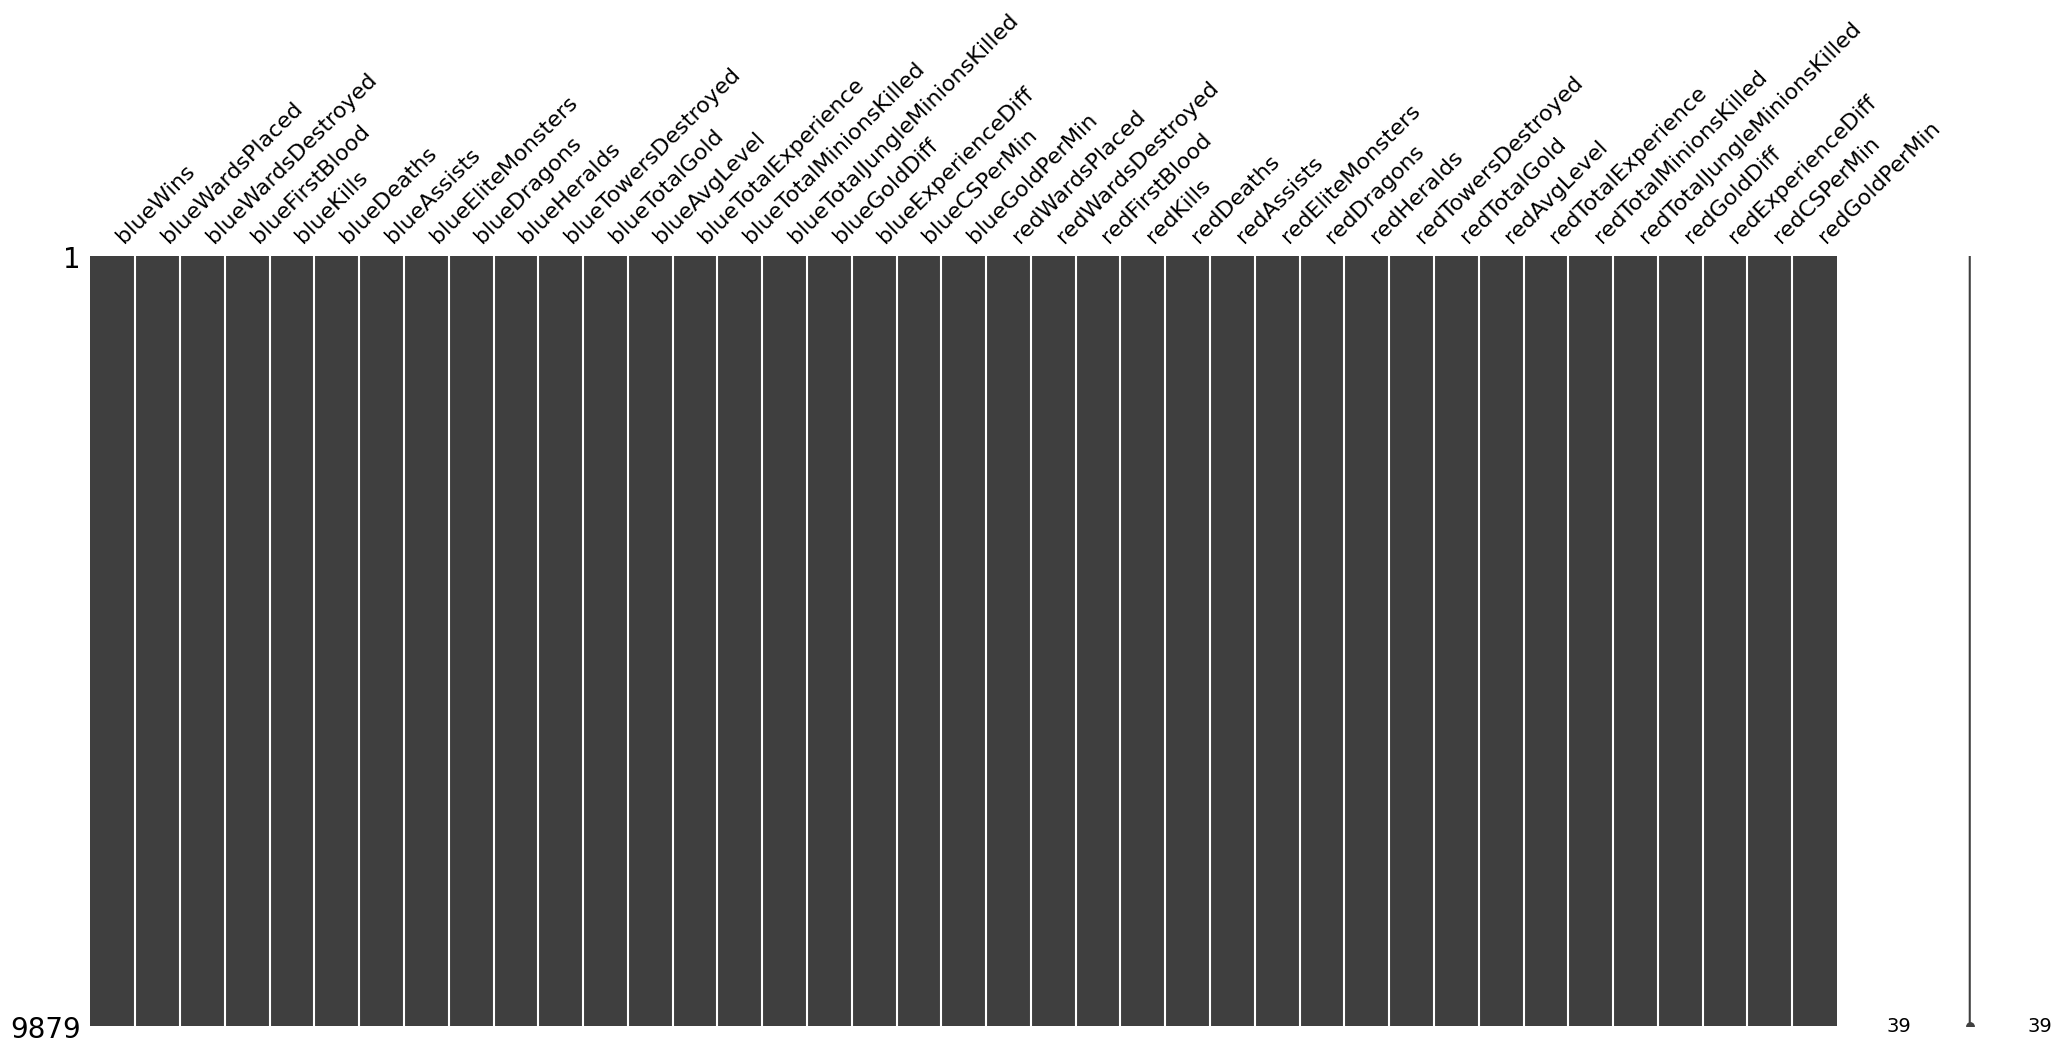

In [480]:
msno.matrix(lol_data)
plt.show()

In [481]:
lol_data.isnull().sum()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestr

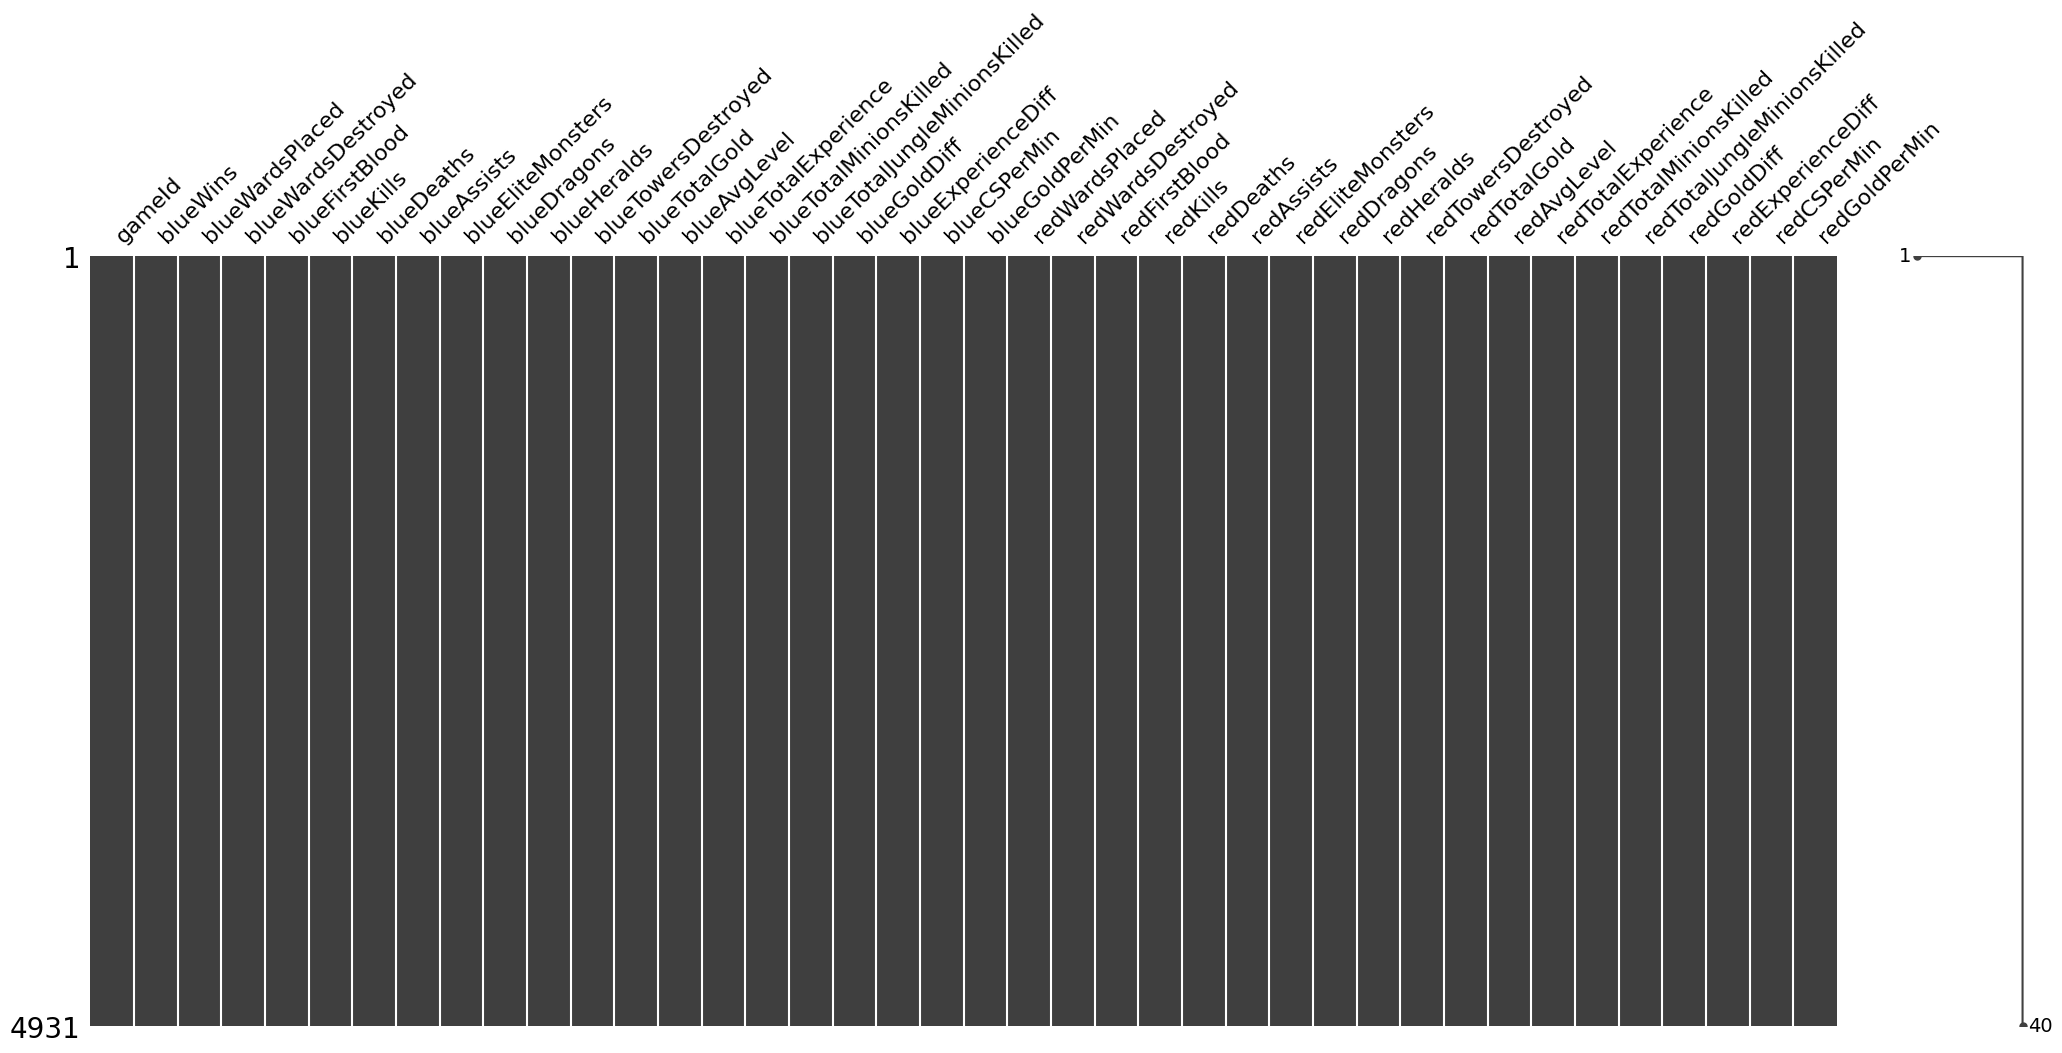

In [482]:
msno.matrix(lol_win_data)
plt.show()

In [483]:
lol_win_data.isnull().sum()

gameId                          1
blueWins                        0
blueWardsPlaced                 1
blueWardsDestroyed              1
blueFirstBlood                  1
blueKills                       1
blueDeaths                      1
blueAssists                     1
blueEliteMonsters               1
blueDragons                     1
blueHeralds                     1
blueTowersDestroyed             1
blueTotalGold                   1
blueAvgLevel                    1
blueTotalExperience             1
blueTotalMinionsKilled          1
blueTotalJungleMinionsKilled    1
blueGoldDiff                    1
blueExperienceDiff              1
blueCSPerMin                    1
blueGoldPerMin                  1
redWardsPlaced                  1
redWardsDestroyed               1
redFirstBlood                   1
redKills                        1
redDeaths                       1
redAssists                      1
redEliteMonsters                1
redDragons                      1
redHeralds    

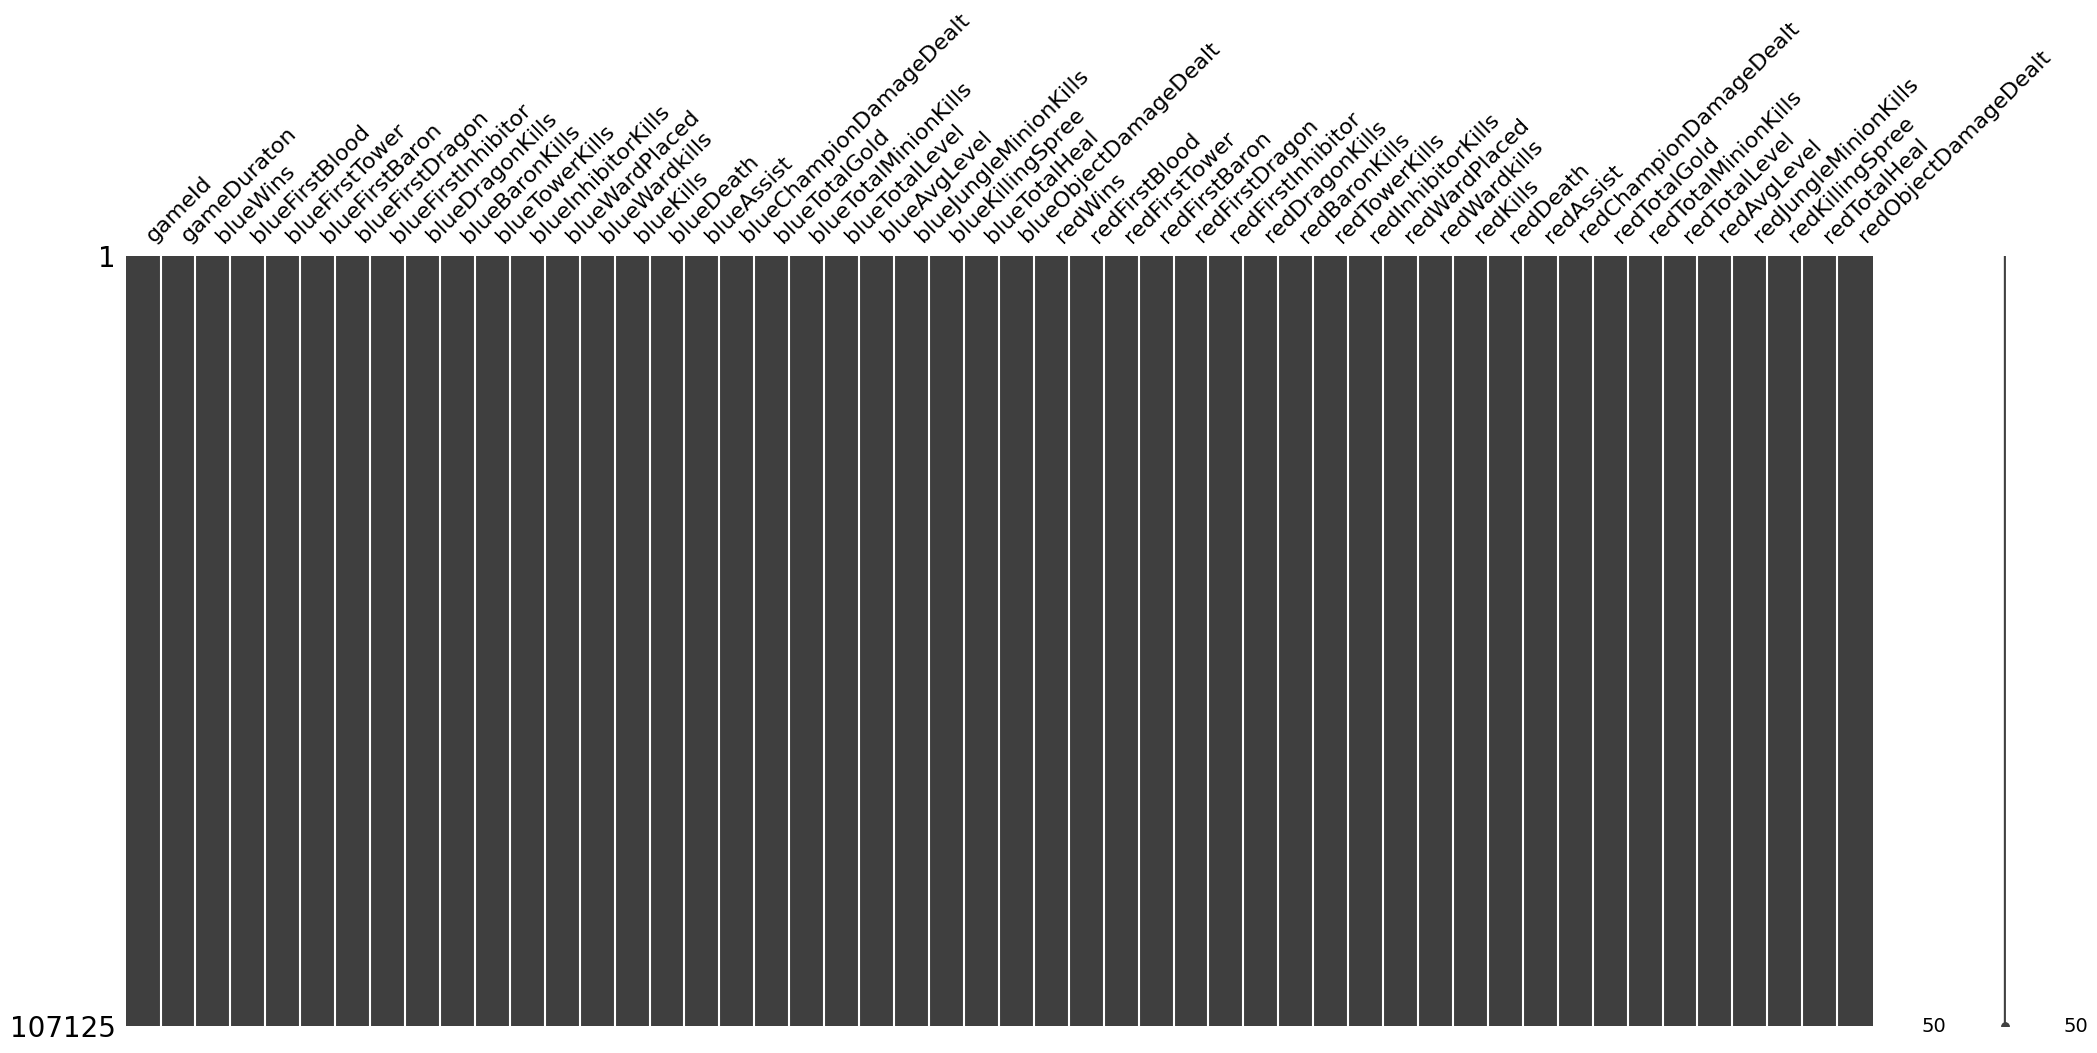

In [484]:
msno.matrix(m_lol_data)
plt.show()

In [485]:
m_lol_data.isnull().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

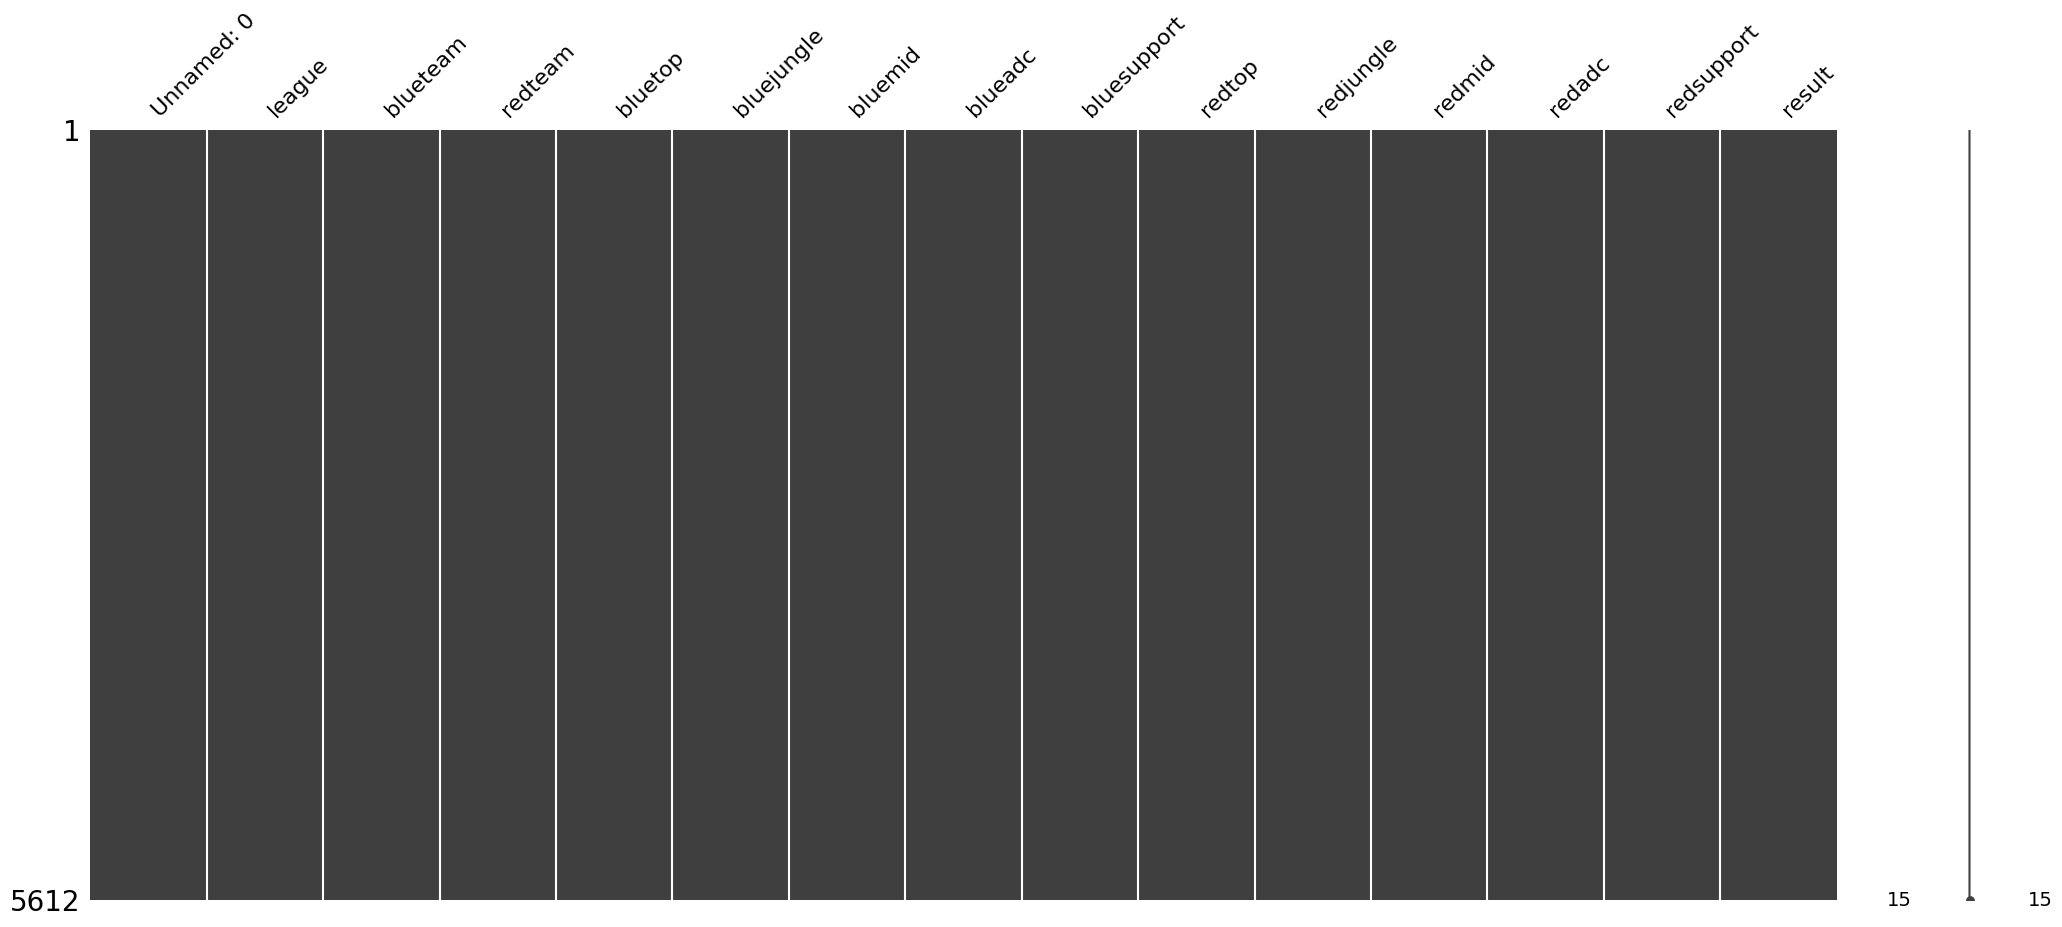

In [486]:
msno.matrix(match_lol_data)
plt.show()

In [487]:
match_lol_data.isnull().sum()

Unnamed: 0     0
league         0
blueteam       0
redteam        0
bluetop        0
bluejungle     0
bluemid        0
blueadc        0
bluesupport    0
redtop         0
redjungle      0
redmid         0
redadc         0
redsupport     0
result         0
dtype: int64

결측값 없음 확인

## 데이터의 팀별 승률

### 시각화

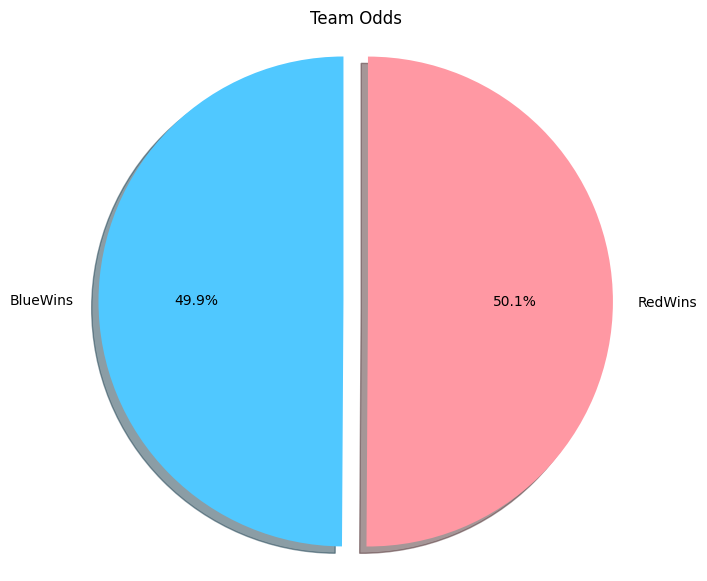

In [488]:
labels = 'BlueWins', 'RedWins'
sizes = [lol_data.blueWins[lol_data['blueWins'] == 1].count(), lol_data.blueWins[lol_data['blueWins'] == 0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig1,ax1 = plt.subplots(figsize = (7, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
ax1.axis('equal')
plt.title('Team Odds')
plt.show()

## Total Team Diff

### 데이터 피처엔지니어링

In [489]:
# Gold
team_gold = pd.DataFrame(lol_data['blueTotalGold'])
team_gold['redTotalGold'] = lol_data['redTotalGold']
team_gold['blueGold']= lol_data['blueGoldDiff']
team_gold['redGold'] = lol_data['redGoldDiff']

print(team_gold.head())

# Experience
team_ex = pd.DataFrame(lol_data['blueTotalExperience'])
team_ex['redTotalExperience'] = lol_data['redTotalExperience']

print(team_ex.head())

# Minions killd
team_minions = pd.DataFrame(lol_data['blueTotalMinionsKilled'])
team_minions['redTotalMinionsKilled'] = lol_data['redTotalMinionsKilled']

print(team_minions.head())

# JungleMiniosKilled
team_jminions = pd.DataFrame(lol_data['blueTotalJungleMinionsKilled'])
team_jminions['redTotalJungleMinionsKilled'] = lol_data['redTotalJungleMinionsKilled']

print(team_jminions.head())

   blueTotalGold  redTotalGold  blueGold  redGold
0          17210         16567       643     -643
1          14712         17620     -2908     2908
2          16113         17285     -1172     1172
3          15157         16478     -1321     1321
4          16400         17404     -1004     1004
   blueTotalExperience  redTotalExperience
0                17039               17047
1                16265               17438
2                16221               17254
3                17954               17961
4                18543               18313
   blueTotalMinionsKilled  redTotalMinionsKilled
0                     195                    197
1                     174                    240
2                     186                    203
3                     201                    235
4                     210                    225
   blueTotalJungleMinionsKilled  redTotalJungleMinionsKilled
0                            36                           55
1                         

### 시각화

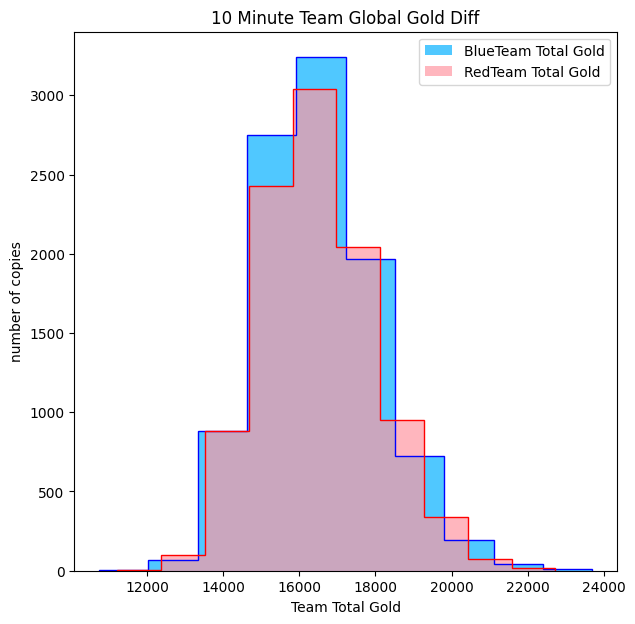

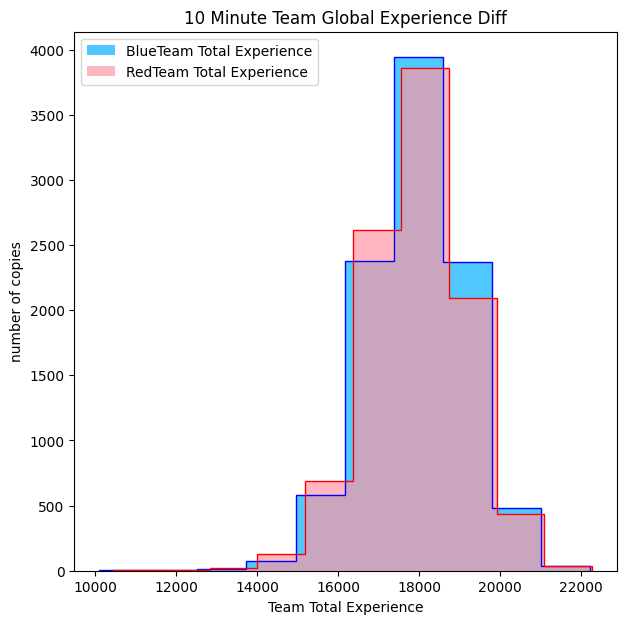

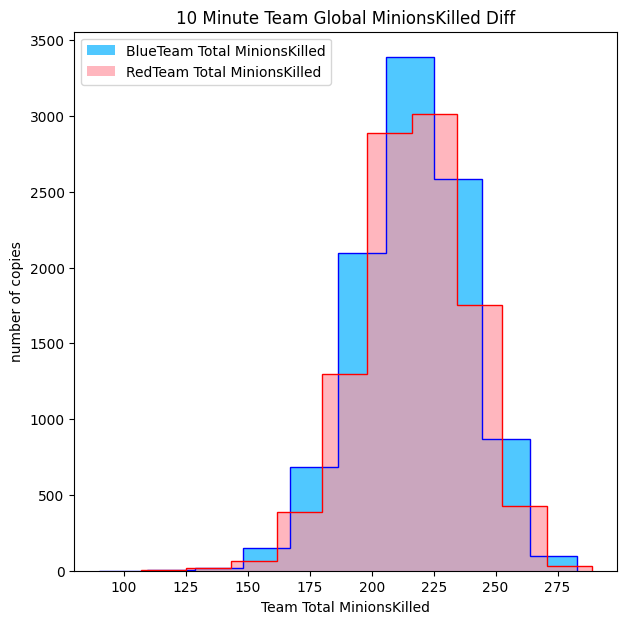

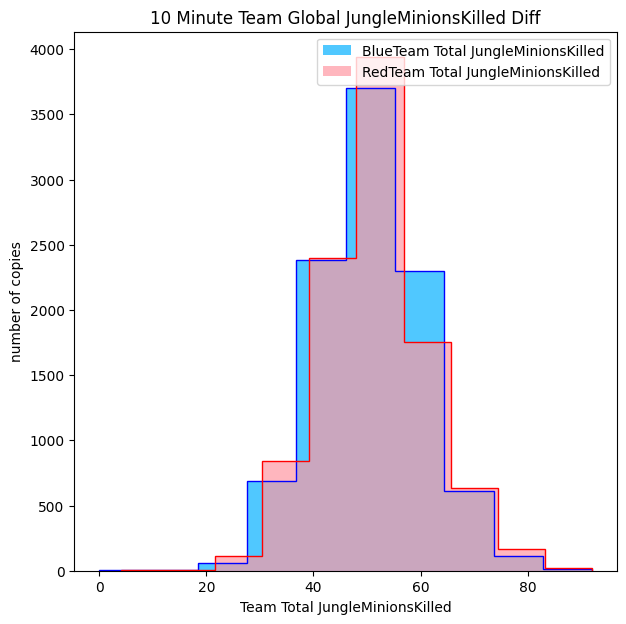

In [490]:
# Gold
fig, axes = plt.subplots(figsize=(7, 7))

axes.hist(team_gold['blueTotalGold'], color = '#50C8FF', label = 'BlueTeam Total Gold')
axes.hist(team_gold['redTotalGold'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total Gold')
axes.hist(team_gold['blueTotalGold'], histtype = 'step', color = 'b')
axes.hist(team_gold['redTotalGold'], histtype = 'step', color = 'r')
axes.set_xlabel('Team Total Gold')
axes.set_ylabel('number of copies')
axes.set_title('10 Minute Team Global Gold Diff')
axes.legend()
plt.show()

# Experience
fig, axes = plt.subplots(figsize=(7, 7))

axes.hist(team_ex['blueTotalExperience'], color = '#50C8FF', label = 'BlueTeam Total Experience')
axes.hist(team_ex['redTotalExperience'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total Experience')
axes.hist(team_ex['blueTotalExperience'], histtype = 'step', color = 'b')
axes.hist(team_ex['redTotalExperience'], histtype = 'step', color = 'r')
axes.set_xlabel('Team Total Experience')
axes.set_ylabel('number of copies')
axes.set_title('10 Minute Team Global Experience Diff')
axes.legend()
plt.show()

# Minions killd
fig, axes = plt.subplots(figsize=(7, 7))

axes.hist(team_minions['blueTotalMinionsKilled'], color = '#50C8FF', label = 'BlueTeam Total MinionsKilled')
axes.hist(team_minions['redTotalMinionsKilled'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total MinionsKilled')
axes.hist(team_minions['blueTotalMinionsKilled'], histtype = 'step', color = 'b')
axes.hist(team_minions['redTotalMinionsKilled'], histtype = 'step', color = 'r')
axes.set_xlabel('Team Total MinionsKilled')
axes.set_ylabel('number of copies')
axes.set_title('10 Minute Team Global MinionsKilled Diff')
axes.legend()
plt.show()

# JungleMiniosKilled
fig, axes = plt.subplots(figsize=(7, 7))

axes.hist(team_jminions['blueTotalJungleMinionsKilled'], color = '#50C8FF', label = 'BlueTeam Total JungleMinionsKilled')
axes.hist(team_jminions['redTotalJungleMinionsKilled'], color = '#FF98A3', alpha = 0.7, label = 'RedTeam Total JungleMinionsKilled')
axes.hist(team_jminions['blueTotalJungleMinionsKilled'], histtype = 'step', color = 'b')
axes.hist(team_jminions['redTotalJungleMinionsKilled'], histtype = 'step', color = 'r')
axes.set_xlabel('Team Total JungleMinionsKilled')
axes.set_ylabel('number of copies')
axes.set_title('10 Minute Team Global JungleMinionsKilled Diff')
axes.legend()
plt.show()

## Global Blue Wins Graph

### 데이터 피처엔지니어링

In [491]:
# 퍼블 차이
firstblood = pd.DataFrame(lol_win_data['blueFirstBlood'])
firstblood['bluewins'] = lol_win_data['blueWins']
firstblood_l = list(firstblood['blueFirstBlood'])
firstblood_t = list(firstblood['bluewins'])


firstblood_tt = []

for f_l, f_t in zip(firstblood_l, firstblood_t):
    if f_l == 1:
        if f_t == 1:
            firstblood_tt.append(1)
        else:
            firstblood_tt.append(0)
    else:
        firstblood_tt.append(0)

firstblood_tt = pd.DataFrame(firstblood_tt)
firstblood['test'] = firstblood_tt
firstblood = firstblood.dropna(axis=0)

print(firstblood.head())

# 포블차이
r_m_lol_data = pd.DataFrame(m_lol_data['blueFirstTower'])
r_m_lol_data['blueWins'] = m_lol_data['blueWins']

r_m_lol_data = r_m_lol_data.astype(str)

win_m_lol_data = r_m_lol_data[r_m_lol_data['blueWins'].str.contains('0')].index
r_m_lol_data.drop(win_m_lol_data, inplace = True)
r_m_lol_data = r_m_lol_data.astype(int)

firsttower_l = list(r_m_lol_data['blueFirstTower'])
firsttower_t = list(r_m_lol_data['blueWins'])

firsttower_tt = []

for t_l, t_t in zip(firsttower_l, firsttower_t):
    if t_l == 1:
        if t_t == 1:
            firsttower_tt.append(1)
        else:
            firsttower_tt.append(0)
    else:
        firsttower_tt.append(0)

firsttower_tt = pd.DataFrame(firsttower_tt)
r_m_lol_data['test'] = firsttower_tt
r_m_lol_data = r_m_lol_data.dropna(axis=0)

print(r_m_lol_data.head())

# 골드 차이
gold_team = pd.DataFrame(lol_win_data['blueGoldDiff'])
gold_team['bluewins'] = lol_win_data['blueWins']
gold_team_l = list(gold_team['blueGoldDiff'])
gold_team_t = list(gold_team['bluewins'])


gold_team_tt = []

for g_l, g_t in zip(gold_team_l, gold_team_t):
    if g_l > 0:
        if g_t == 1:
            gold_team_tt.append(1)
        else:
            gold_team_tt.append(0)
    else:
        gold_team_tt.append(0)

gold_team_tt = pd.DataFrame(gold_team_tt)
gold_team['test'] = gold_team_tt
gold_team = gold_team.dropna(axis=0)

print(gold_team.head())

# 경험치 차이
ex_team = pd.DataFrame(lol_win_data['blueExperienceDiff'])
ex_team['bluewins'] = lol_win_data['blueWins']
ex_team_l = list(ex_team['blueExperienceDiff'])
ex_team_t = list(ex_team['bluewins'])


ex_team_tt = []

for e_l, e_t in zip(ex_team_l, ex_team_t):
    if e_l > 0:
        if e_t == 1:
            ex_team_tt.append(1)
        else:
            ex_team_tt.append(0)
    else:
        ex_team_tt.append(0)

ex_team_tt = pd.DataFrame(ex_team_tt)
ex_team['test'] = ex_team_tt
ex_team = ex_team.dropna(axis=0)

print(ex_team.head())

   blueFirstBlood  bluewins  test
1             0.0         1     0
2             1.0         1     1
3             1.0         1     1
4             1.0         1     1
5             1.0         1     1
   blueFirstTower  blueWins  test
2               0         1   1.0
3               1         1   1.0
5               1         1   1.0
6               1         1   1.0
8               1         1   1.0
   blueGoldDiff  bluewins  test
1         698.0         1     1
2        2411.0         1     1
3       -1548.0         1     0
4        3274.0         1     1
5        -470.0         1     0
   blueExperienceDiff  bluewins  test
1               101.0         1     1
2              1563.0         1     1
3             -1574.0         1     0
4              1659.0         1     1
5              -187.0         1     0


### 시각화

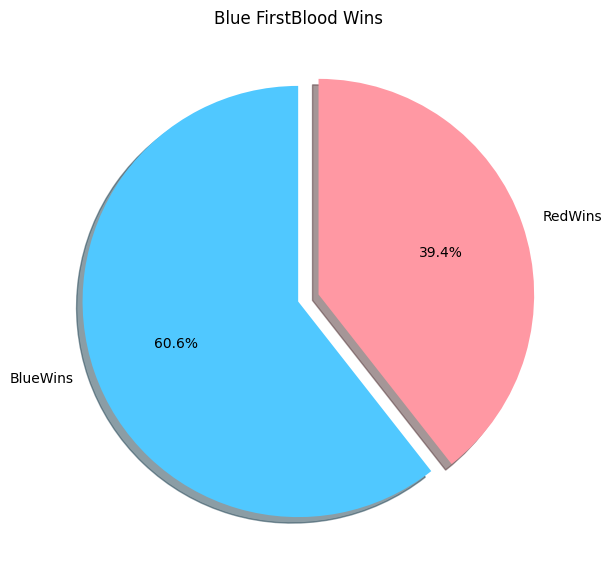

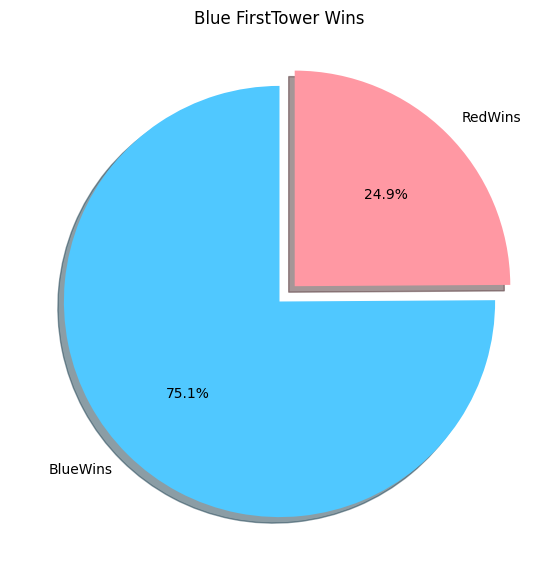

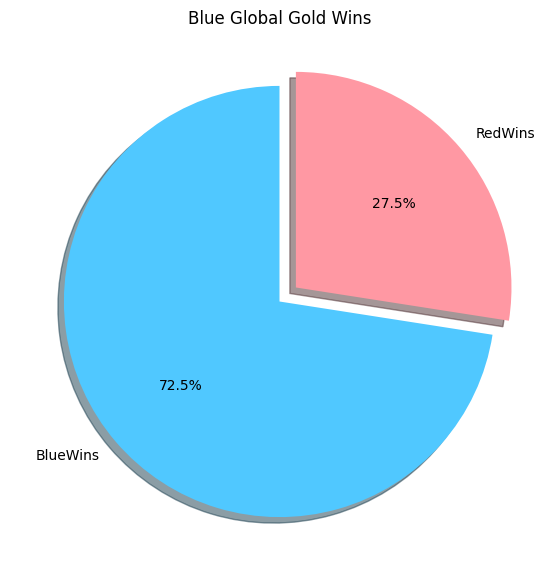

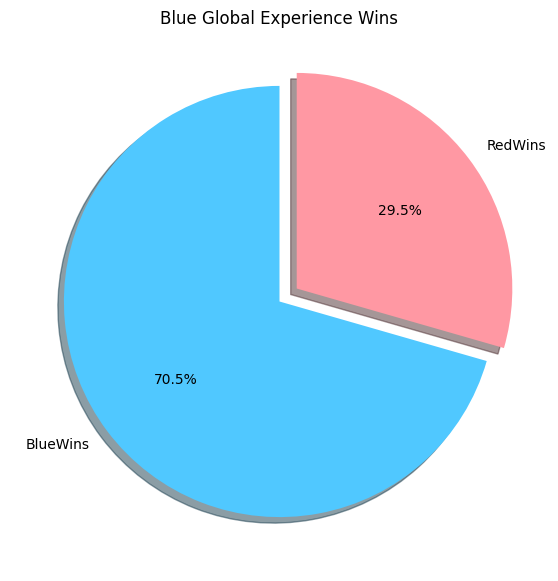

In [492]:
# 퍼블
labels = 'BlueWins', 'RedWins'
sizes = [firstblood.test[firstblood['test'] == 1].count(), firstblood.test[firstblood['test'] == 0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Blue FirstBlood Wins')
plt.show()

# 포블
sizes = [r_m_lol_data.test[r_m_lol_data['test'] == 1].count(), r_m_lol_data.test[r_m_lol_data['test'] == 0].count()]
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Blue FirstTower Wins')
plt.show()

# 골드
sizes = [gold_team.test[gold_team['test'] == 1].count(), gold_team.test[gold_team['test'] == 0].count()]
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Blue Global Gold Wins')
plt.show()

# 경험치
sizes = [ex_team.test[ex_team['test'] == 1].count(), ex_team.test[ex_team['test'] == 0].count()]
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Blue Global Experience Wins')
plt.show()

## 4가지 상황 합산 후의 블루팀 승률

### 데이터 피처엔지니어링

In [493]:
all_blue = pd.DataFrame(firstblood)
all_blue['blueFirstTower'] = r_m_lol_data['blueFirstTower']
all_blue['blueGoldDiff'] = gold_team['blueGoldDiff']
all_blue['blueExperienceDiff'] = ex_team['blueExperienceDiff']

t_all_blue = all_blue.dropna(axis=0)
t_all_blue.drop(['test'], axis = 1, inplace = True)

all_blue_f = list(t_all_blue['blueFirstBlood'])
all_blue_t = list(t_all_blue['blueFirstTower'])
all_blue_g = list(t_all_blue['blueGoldDiff'])
all_blue_e = list(t_all_blue['blueExperienceDiff'])

all_blue_tt = []

for a_f, a_t, a_g, a_e in zip(all_blue_f, all_blue_t, all_blue_g, all_blue_e):
    if a_f == 1:
        if a_t == 1:
            if a_g > 0:
                if a_e >0:
                    all_blue_tt.append(1)
                else:
                    all_blue_tt.append(0)
            else:
                all_blue_tt
        else:
            all_blue_tt.append(0)
    else:
        all_blue_tt.append(0)

all_blue_tt = pd.DataFrame(all_blue_tt)
t_all_blue['all_wins'] = all_blue_tt

t_all_blue.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3204\3395052120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_all_blue.drop(['test'], axis = 1, inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3204\3395052120.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_all_blue['all_wins'] = all_blue_tt


,blueFirstBlood,bluewins,blueFirstTower,blueGoldDiff,blueExperienceDiff,all_wins
2,1.0,1,0.0,2411.0,1563.0,1.0
3,1.0,1,1.0,-1548.0,-1574.0,0.0
5,1.0,1,1.0,-470.0,-187.0,1.0
6,1.0,1,1.0,5228.0,3378.0,1.0
8,1.0,1,1.0,2526.0,1625.0,0.0


### 시각화

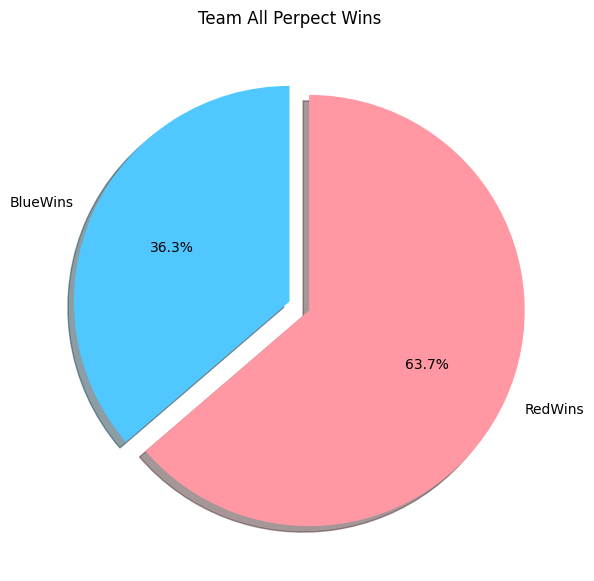

In [494]:
labels = 'BlueWins', 'RedWins'
sizes = [t_all_blue.all_wins[t_all_blue['all_wins'] == 1].count(), t_all_blue.all_wins[t_all_blue['all_wins'] == 0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Team All Perpect Wins')
plt.show()

## KDA 별 승률

### 데이터 전처리

In [495]:
blue_kills = list(lol_data['blueKills'])
blue_death = list(lol_data['blueDeaths'])
blue_assist = list(lol_data['blueAssists'])

blue_kda_list = []

def bluekda(k, d, a):
    for kl, dl, al in zip(k, d, a):
        if dl == 0:
            dl = 1
            blue_kda = (kl + al) / dl
            blue_kda_list.append(blue_kda)
        else:
            blue_kda = (kl + al) / dl
            blue_kda_list.append(blue_kda)

bluekda(blue_kills, blue_death, blue_assist)

blue_kda_list = pd.DataFrame(blue_kda_list)
blue_kda = pd.DataFrame(lol_win_data['blueWins'])
blue_kda['bluekda'] = blue_kda_list

blue_kda.head()

,blueWins,bluekda
0,0,3.333333
1,1,2.000000
2,1,1.000000
3,1,1.800000
4,1,2.000000


## KDA : 1.5

### 데이터 피처엔지니어링

In [496]:
blue_kda_w = list(blue_kda['blueWins'])
blue_kda_k = list(blue_kda['bluekda'])


blue_kda_tt = []

# KDA 1.5일때

for b_w, b_k in zip(blue_kda_w, blue_kda_k):
    if b_k >= 1.5:
        if b_w > 0:
            blue_kda_tt.append(1)
        else:
            blue_kda_tt.append(0)
    else:
        blue_kda_tt.append(0)

blue_kda_tt = pd.DataFrame(blue_kda_tt)
blue_kda['all_wins'] = blue_kda_tt

blue_kda.head()

,blueWins,bluekda,all_wins
0,0,3.333333,0
1,1,2.000000,1
2,1,1.000000,0
3,1,1.800000,1
4,1,2.000000,1


### 시각화

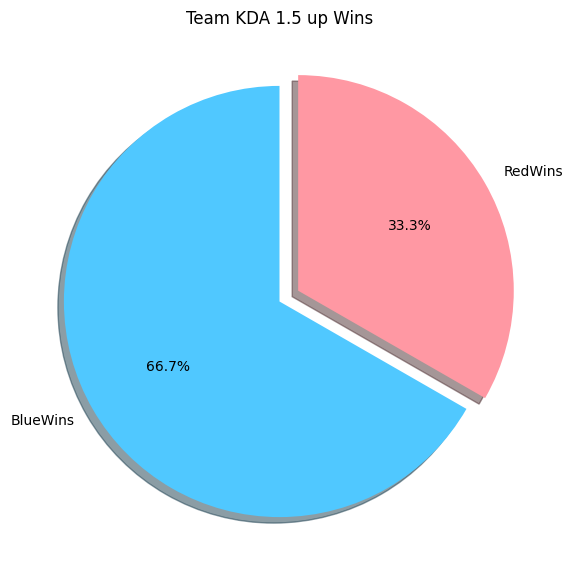

In [497]:
labels = 'BlueWins', 'RedWins'
sizes = [blue_kda.all_wins[blue_kda['all_wins'] == 1].count(), blue_kda.all_wins[blue_kda['all_wins'] == 0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Team KDA 1.5 up Wins')
plt.show()

## KDA : 3

### 데이터 피처엔지니어링

In [498]:
# KDA 3 일때
blue_kda_tt = []

for b_w, b_k in zip(blue_kda_w, blue_kda_k):
    if b_k >= 3:
        if b_w > 0:
            blue_kda_tt.append(1)
        else:
            blue_kda_tt.append(0)
    else:
        blue_kda_tt.append(0)

blue_kda_tt = pd.DataFrame(blue_kda_tt)
blue_kda['all_wins'] = blue_kda_tt

blue_kda.head()

,blueWins,bluekda,all_wins
0,0,3.333333,0
1,1,2.000000,0
2,1,1.000000,0
3,1,1.800000,0
4,1,2.000000,0


### 시각화

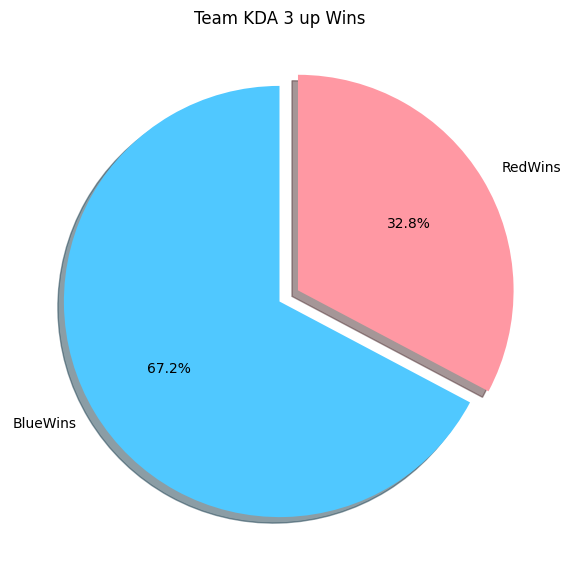

In [499]:
labels = 'BlueWins', 'RedWins'
sizes = [blue_kda.all_wins[blue_kda['all_wins'] == 0].count(), blue_kda.all_wins[blue_kda['all_wins'] == 1].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Team KDA 3 up Wins')
plt.show()

## KDA : 5

### 데이터 피처엔지니어링

In [500]:
# KDA 5 일때
blue_kda_tt = []

for b_w, b_k in zip(blue_kda_w, blue_kda_k):
    if b_k >= 5:
        if b_w > 0:
            blue_kda_tt.append(1)
        else:
            blue_kda_tt.append(0)
    else:
        blue_kda_tt.append(0)

blue_kda_tt = pd.DataFrame(blue_kda_tt)
blue_kda['all_wins'] = blue_kda_tt

blue_kda.head()

,blueWins,bluekda,all_wins
0,0,3.333333,0
1,1,2.000000,0
2,1,1.000000,0
3,1,1.800000,0
4,1,2.000000,0


### 시각화

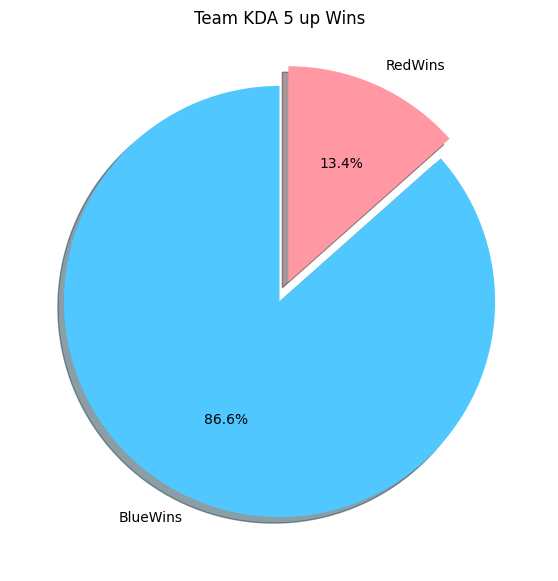

In [501]:
labels = 'BlueWins', 'RedWins'
sizes = [blue_kda.all_wins[blue_kda['all_wins'] == 0].count(), blue_kda.all_wins[blue_kda['all_wins'] == 1].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Team KDA 5 up Wins')
plt.show()

## Team Minions Diff

### 데이터 피처엔지니어링

In [502]:
b_m_k = list(lol_data['blueTotalMinionsKilled'])
r_m_k = list(lol_data['redTotalMinionsKilled'])

blue_m_list = []

def bluemin(q, t):
    for kl, dl in zip(q, t):
        bluemin = kl - dl
        blue_m_list.append(bluemin)

bluemin(b_m_k, r_m_k)


blue_m_list = pd.DataFrame(blue_m_list)
blue_min = pd.DataFrame(lol_win_data['blueWins'])
blue_min['bluemindiff'] = blue_m_list

# 시각화자료 준비
blue_min_w = list(blue_min['blueWins'])
blue_min_m = list(blue_min['bluemindiff'])


blue_min_tt = []

# 미니언차이

for b_w, b_m in zip(blue_min_w, blue_min_m):
    if b_w > 0:
        if b_m > 0:
            blue_min_tt.append(1)
        else:
            blue_min_tt.append(0)
    else:
        blue_min_tt.append(0)

blue_min_tt = pd.DataFrame(blue_min_tt)
blue_min['all_wins'] = blue_min_tt

blue_min.head()

,blueWins,bluemindiff,all_wins
0,0,-2,0
1,1,-66,0
2,1,-17,0
3,1,-34,0
4,1,-15,0


### 시각화

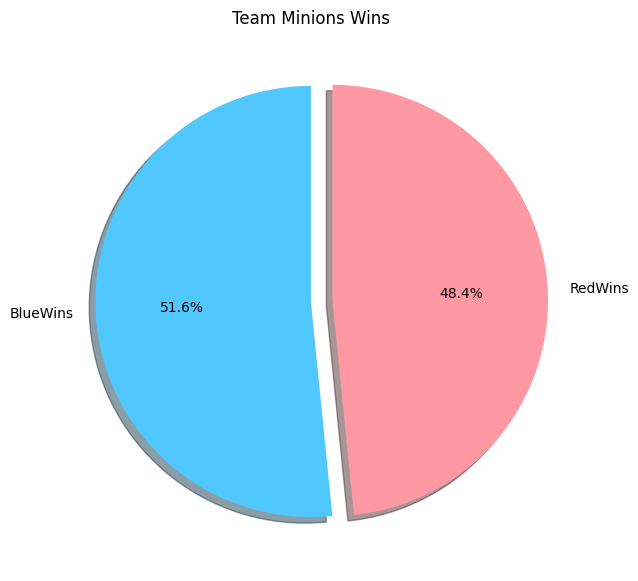

In [503]:
labels = 'BlueWins', 'RedWins'
sizes = [blue_min.all_wins[blue_min['all_wins'] == 0].count(), blue_min.all_wins[blue_min['all_wins'] == 1].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Team Minions Wins')
plt.show()

## 정글 미니언

### 데이터 피처엔지니어링

In [504]:
b_jm_k = list(lol_data['blueTotalJungleMinionsKilled'])
r_jm_k = list(lol_data['redTotalJungleMinionsKilled'])

blue_jm_list = []

def bluejmin(q, t):
    for kl, dl in zip(q, t):
        bluejmin = kl - dl
        blue_jm_list.append(bluejmin)

bluejmin(b_jm_k, r_jm_k)


blue_jm_list = pd.DataFrame(blue_jm_list)
blue_jmin = pd.DataFrame(lol_win_data['blueWins'])
blue_jmin['blueJmindiff'] = blue_jm_list

# 시각화자료 준비
blue_jmin_w = list(blue_jmin['blueWins'])
blue_jmin_m = list(blue_jmin['blueJmindiff'])


blue_jmin_tt = []

# 미니언차이

for b_jw, b_jm in zip(blue_jmin_w, blue_jmin_m):
    if b_jw > 0:
        if b_jm > 0:
            blue_jmin_tt.append(1)
        else:
            blue_jmin_tt.append(0)
    else:
        blue_jmin_tt.append(0)

blue_jmin_tt = pd.DataFrame(blue_jmin_tt)
blue_jmin['all_wins'] = blue_jmin_tt

blue_jmin.head()

,blueWins,blueJmindiff,all_wins
0,0,-19,0
1,1,-9,0
2,1,18,1
3,1,8,1
4,1,-10,0


### 시각화

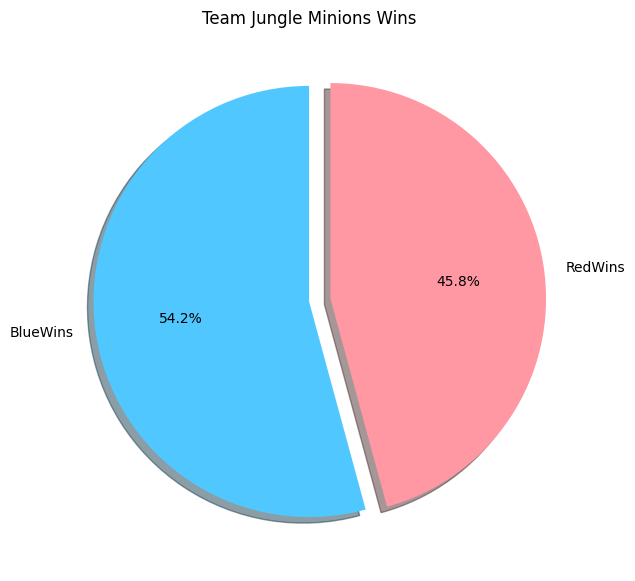

In [505]:
labels = 'BlueWins', 'RedWins'
sizes = [blue_jmin.all_wins[blue_jmin['all_wins'] == 0].count(), blue_jmin.all_wins[blue_jmin['all_wins'] == 1].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('Team Jungle Minions Wins')
plt.show()

### Heralds Diff

### 데이터 피처엔지니어링

In [506]:
heralds_diff_t = pd.DataFrame(lol_win_data['blueHeralds'])
heralds_diff_t['redHeralds'] = lol_win_data['redHeralds']

heralds_diff_t.dropna(axis = 0)

heralds_diff_t = heralds_diff_t[(heralds_diff_t['redHeralds'] == 1.0) | (heralds_diff_t['blueHeralds'] == 1.0)]

heralds_diff_t['blueWins'] = lol_win_data['blueWins']

heralds_diff_t.head()

,blueHeralds,redHeralds,blueWins
7,0.0,1.0,1
12,1.0,0.0,1
19,1.0,0.0,1
21,1.0,0.0,1
24,1.0,0.0,1


### 시각화

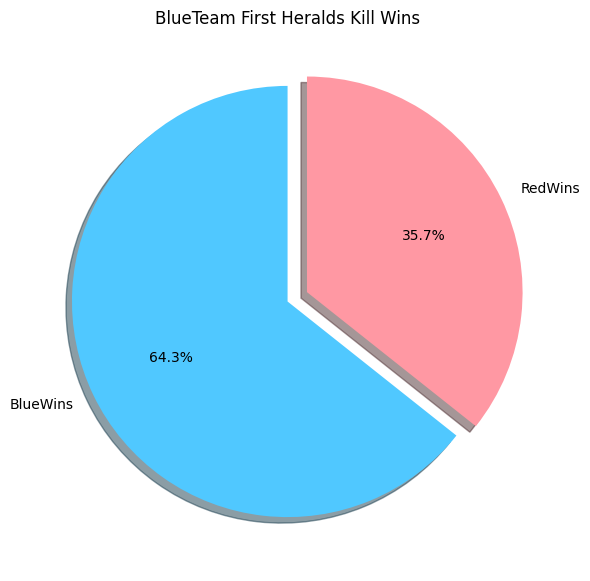

In [507]:
labels = 'BlueWins', 'RedWins'
sizes = [heralds_diff_t.blueHeralds[heralds_diff_t['blueHeralds'] == 1.0].count(), heralds_diff_t.blueHeralds[heralds_diff_t['blueHeralds'] == 0.0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('BlueTeam First Heralds Kill Wins')
plt.show()

## Team Dragon

### 데이터 피처엔지니어링

In [508]:
dragons_diff_t = pd.DataFrame(lol_win_data['blueDragons'])
dragons_diff_t['redDragons'] = lol_win_data['redDragons']

dragons_diff_t.dropna(axis = 0)

dragons_diff_t = dragons_diff_t[(dragons_diff_t['redDragons'] >= 1.0) | (dragons_diff_t['blueDragons'] >= 1.0)]

dragons_diff_t['blueWins'] = lol_win_data['blueWins']

dragons_diff_t.head()

,blueDragons,redDragons,blueWins
1,1.0,0.0,1
2,1.0,0.0,1
3,1.0,0.0,1
4,1.0,0.0,1
6,0.0,1.0,1


### 시각화

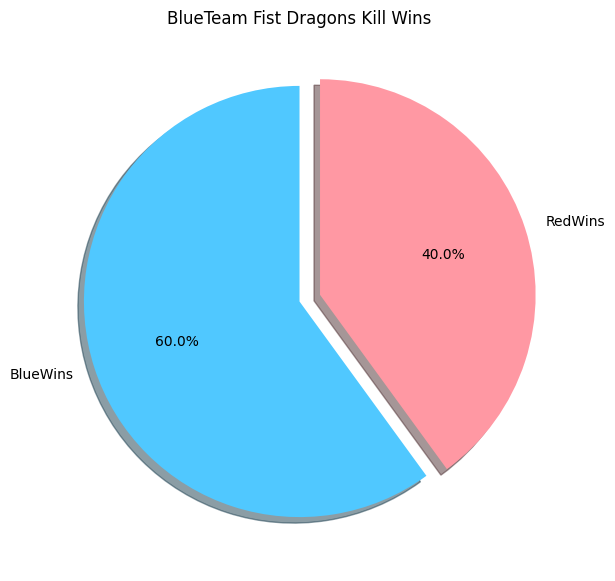

In [509]:
labels = 'BlueWins', 'RedWins'
sizes = [dragons_diff_t.blueDragons[dragons_diff_t['blueDragons'] >= 1.0].count(), dragons_diff_t.blueDragons[dragons_diff_t['blueDragons'] == 0.0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('BlueTeam Fist Dragons Kill Wins')
plt.show()

## Elite Monster Test

### 데이터 피처엔지니어링

In [510]:
elite_diff_t = pd.DataFrame(lol_win_data['blueEliteMonsters'])
elite_diff_t['redEliteMonsters'] = lol_win_data['redEliteMonsters']

elite_diff_t.dropna(axis = 0)

elite_diff_t = elite_diff_t[(elite_diff_t['redEliteMonsters'] >= 1.0) | (elite_diff_t['blueEliteMonsters'] >= 1.0)]

elite_diff_t['blueWins'] = lol_win_data['blueWins']

elite_diff_t.head()

,blueEliteMonsters,redEliteMonsters,blueWins
1,1.0,0.0,1
2,1.0,0.0,1
3,1.0,0.0,1
4,1.0,0.0,1
6,0.0,1.0,1


### 시각화

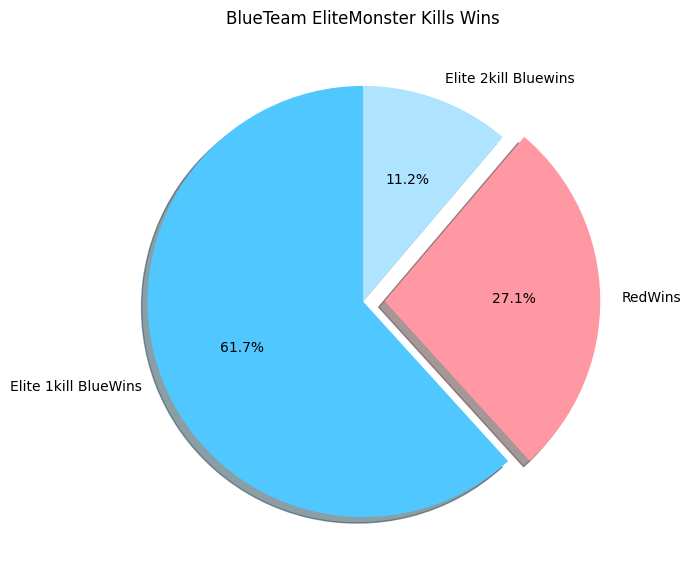

In [511]:
labels = 'Elite 1kill BlueWins', 'RedWins', 'Elite 2kill Bluewins'
sizes = [elite_diff_t.blueEliteMonsters[elite_diff_t['blueEliteMonsters'] >= 1.0].count(), elite_diff_t.blueEliteMonsters[elite_diff_t['blueEliteMonsters'] == 0.0].count(), elite_diff_t.blueEliteMonsters[elite_diff_t['blueEliteMonsters'] >= 2.0].count()]
colors = ['#50C8FF', '#FF98A3', '#aee4ff']
explode = (0, 0.1, 0)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('BlueTeam EliteMonster Kills Wins')
plt.show()

## Elite Monster 1Kill up

### 데이터 피처엔지니어링

In [512]:
elite1_diff_t = pd.DataFrame(lol_win_data['blueEliteMonsters'])
elite1_diff_t['redEliteMonsters'] = lol_win_data['redEliteMonsters']

elite1_diff_t.dropna(axis = 0)

elite1_diff_t = elite1_diff_t[(elite1_diff_t['redEliteMonsters'] >= 1.0) | (elite1_diff_t['blueEliteMonsters'] >= 1.0)]

elite1_diff_t['blueWins'] = lol_win_data['blueWins']

elite1_diff_t.head()

,blueEliteMonsters,redEliteMonsters,blueWins
1,1.0,0.0,1
2,1.0,0.0,1
3,1.0,0.0,1
4,1.0,0.0,1
6,0.0,1.0,1


### 시각화

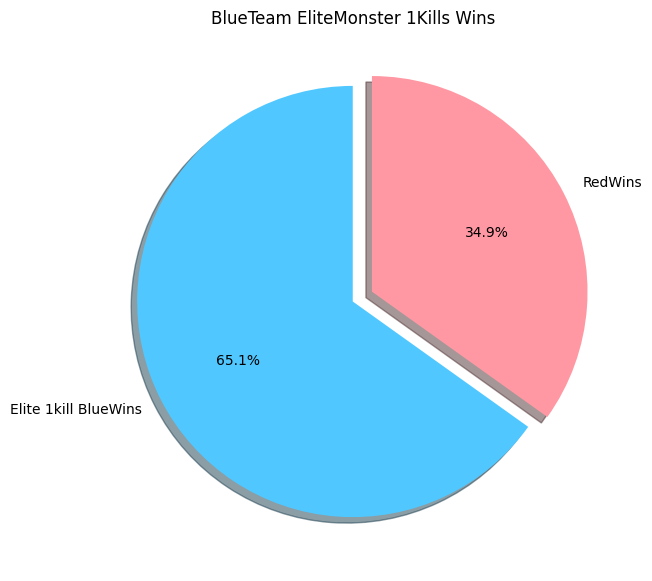

In [513]:
labels = 'Elite 1kill BlueWins', 'RedWins'
sizes = [elite1_diff_t.blueEliteMonsters[elite1_diff_t['blueEliteMonsters'] == 1.0].count(), elite1_diff_t.blueEliteMonsters[elite1_diff_t['blueEliteMonsters'] == 0.0].count()]
colors = ['#50C8FF', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('BlueTeam EliteMonster 1Kills Wins')
plt.show()

## Elite Monster 2Kill up

### 데이터 피처엔지니어링

In [514]:
elite2_diff_t = pd.DataFrame(lol_win_data['blueEliteMonsters'])
elite2_diff_t['redEliteMonsters'] = lol_win_data['redEliteMonsters']

elite2_diff_t.dropna(axis = 0)

elite2_diff_t = elite2_diff_t[(elite2_diff_t['redEliteMonsters'] >= 2.0) | (elite2_diff_t['blueEliteMonsters'] >= 2.0)]

elite2_diff_t['blueWins'] = lol_win_data['blueWins']

elite2_diff_t.head()

,blueEliteMonsters,redEliteMonsters,blueWins
7,0.0,2.0,1
12,2.0,0.0,1
21,2.0,0.0,1
24,2.0,0.0,1
26,2.0,0.0,1


### 시각화

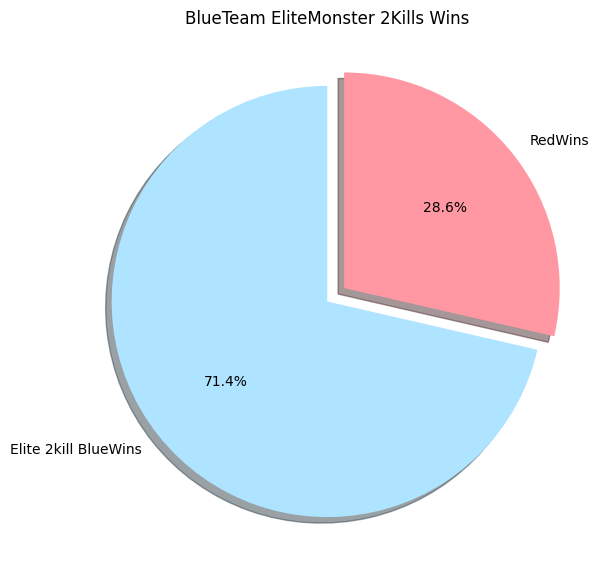

In [515]:
labels = 'Elite 2kill BlueWins', 'RedWins'
sizes = [elite2_diff_t.blueEliteMonsters[elite2_diff_t['blueEliteMonsters'] >= 2.0].count(), elite2_diff_t.blueEliteMonsters[elite2_diff_t['blueEliteMonsters'] == 0.0].count()]
colors = ['#aee4ff', '#FF98A3']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('BlueTeam EliteMonster 2Kills Wins')
plt.show()

## 2020 E-sport SKT1 VS DRX

### 데이터 피처엔지니어링

In [516]:
skt1 = pd.DataFrame(match_lol_data['blueteam'])
skt1['redteam'] = match_lol_data['redteam']
skt1['result'] = match_lol_data['result']

skt1_b = skt1[(skt1['blueteam'] == 'T1') & (skt1['redteam'] == 'DRX')]
skt1_r = skt1[(skt1['blueteam'] == 'DRX') & (skt1['redteam'] == 'T1')]

print(skt1_b.head())
print(skt1_r.head())

     blueteam redteam  result
461        T1     DRX       0
1250       T1     DRX       1
2095       T1     DRX       1
2103       T1     DRX       0
2774       T1     DRX       1
     blueteam redteam  result
460       DRX      T1       0
462       DRX      T1       0
1258      DRX      T1       0
2099      DRX      T1       0
2107      DRX      T1       0


In [517]:
skt1_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 460 to 5352
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   blueteam  8 non-null      object
 1   redteam   8 non-null      object
 2   result    8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 256.0+ bytes


In [518]:
print('test')

test


In [519]:
skt1_r.columns
skt1_r = skt1_r.reindex(columns = ['redteam', 'blueteam', 'result'])

skt1_r.columns = ['blueteam', 'redteam', 'result']
skt1_r

,blueteam,redteam,result
460,T1,DRX,0
462,T1,DRX,0
1258,T1,DRX,0
2099,T1,DRX,0
2107,T1,DRX,0
2767,T1,DRX,1
2776,T1,DRX,1
5352,T1,DRX,1


In [520]:
skt1_r = skt1_r.replace({'result' : 0}, 1.5)
skt1_r = skt1_r.replace({'result' : 1}, 0)
skt1_r = skt1_r.replace({'result' : 1.5}, 1)

skt1_r

,blueteam,redteam,result
460,T1,DRX,1.0
462,T1,DRX,1.0
1258,T1,DRX,1.0
2099,T1,DRX,1.0
2107,T1,DRX,1.0
2767,T1,DRX,0.0
2776,T1,DRX,0.0
5352,T1,DRX,0.0


### skt1_b + skt1_r 합치기

In [521]:
skt1 = pd.concat([skt1_b, skt1_r])

skt1

,blueteam,redteam,result
461,T1,DRX,0.0
1250,T1,DRX,1.0
2095,T1,DRX,1.0
2103,T1,DRX,0.0
2774,T1,DRX,1.0
5344,T1,DRX,1.0
5357,T1,DRX,1.0
460,T1,DRX,1.0
462,T1,DRX,1.0
1258,T1,DRX,1.0


### 결측값 확인

In [522]:
skt1.isnull().sum()

blueteam    0
redteam     0
result      0
dtype: int64

### 시각화

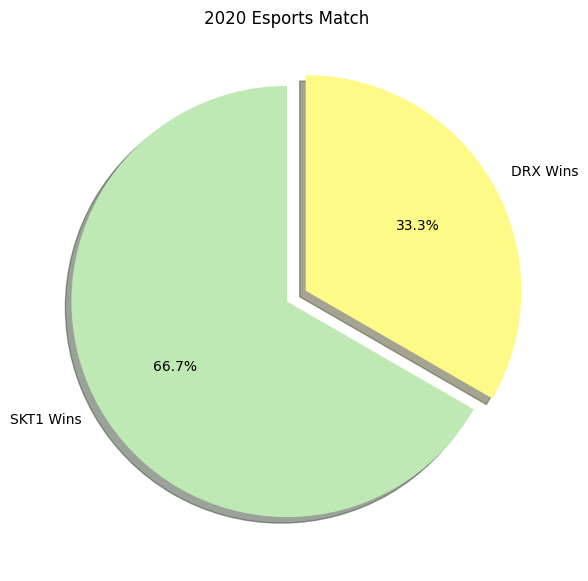

In [523]:
labels = 'SKT1 Wins', 'DRX Wins'
sizes = [skt1.result[skt1['result'] >= 1.0].count(), skt1.result[skt1['result'] == 0.0].count()]
colors = ['#bee9b4', '#fdfa87']
explode = (0, 0.1)
fig, axes = plt.subplots(figsize = (7, 7))
axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 90,colors = colors)
axes.set_title('2020 Esports Match')
plt.show()

## Reference

[10분 전에 어떤 결정이 승리로 이어지나요?](https://www.kaggle.com/code/jeremyarancio/which-decisions-before-10min-lead-to-win)  
[리그 오브 레전드 10분 예측](https://www.kaggle.com/code/shengkunwang/league-of-legends-10-mins-prediction)  
[리그 오브 레전드 하이 엘로 랭크 게임(2020)](https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-ranked-games2020)  
[리그 오브 레전드 2020 E스포츠 경기 데이터](https://www.kaggle.com/datasets/xmorra/lol2020esports?select=matches2020.csv)  
  

[[Python pandas] DataFrame의 문자열 칼럼을 숫자형으로 바꾸기 : pd.to_numeric(), DataFrame.astype()](https://rfriend.tistory.com/470)  
[[Python] 데이터프레임 합치기 :: pd.concat](https://mizykk.tistory.com/126)  
[[Pandas]특정조건 만족하는 인덱스(행),칼럼(열) 삭제하기](https://bohemihan.tistory.com/entry/Pandas-%ED%8A%B9%EC%A0%95%EC%A1%B0%EA%B1%B4-%EB%A7%8C%EC%A1%B1%ED%95%98%EB%8A%94-%EC%9D%B8%EB%8D%B1%EC%8A%A4%ED%96%89-%EC%B9%BC%EB%9F%BC%EC%97%B4-%EC%82%AD%EC%A0%9C%ED%95%98%EA%B8%B0)  
[[판다스, pandas] dataframe 특정 조건에 맞는 데이터 추출](https://computer-science-student.tistory.com/375)  
[[python] Dataframe column 명 변경, column 순서 변경](https://clolee.tistory.com/20)  
[[Pandas] 파이썬 데이터프레임 값 변경/대체 방법 정리](https://jimmy-ai.tistory.com/245)  
  
[Seaborn을 사용한 데이터 분포 시각화](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)  
[Matplotlib Tutorial](https://wikidocs.net/92094)